# Working on analysis part of topic modeling

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
import sys
import re, numpy as np, pandas as pd

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Loading file

In [6]:
import pickle

In [7]:
data = pd.read_pickle('top10_topic_dominant.pkl')

In [8]:
data.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.4353,"hydrogen, fuel, water, tank, cell, diesel, oil...","[electrical, energy, system, include, electric..."
1,1,5.0,0.6834,"battery, power, voltage, electric, charge, ene...","[electrical, energy, system, include, electric..."
2,2,9.0,0.6159,"catalyst, exhaust, gas, powertrain, fuel, cell...","[object, provide, particulate, trap, diesel, e..."
3,3,7.0,0.3142,"body, plate, support, fix, part, lock, member,...","[purpose, obtain, trap, leakage, exhaust, gas,..."
4,4,9.0,0.4365,"catalyst, exhaust, gas, powertrain, fuel, cell...","[particulate, trap, diesel, engine, design, ef..."
5,5,9.0,0.6045,"catalyst, exhaust, gas, powertrain, fuel, cell...","[pct, pct_jp_sec_date, pub, mar, object, provi..."
6,6,13.0,0.6788,"air, pipe, filter, fuel, cool, oil, inlet, flo...","[mix, device, gas, fuel, air, internal, combus..."
7,7,13.0,0.6586,"air, pipe, filter, fuel, cool, oil, inlet, flo...","[mix, device, gas, fuel, air, internal, combus..."
8,8,7.0,0.4477,"body, plate, support, fix, part, lock, member,...","[area, mouth, injector, construct, flow, guide..."
9,9,13.0,0.5354,"air, pipe, filter, fuel, cool, oil, inlet, flo...","[internal, combustion, engine, least, injectio..."


In [9]:
data.Dominant_Topic.value_counts(ascending=True)

2.0         4
6.0        19
0.0        88
12.0      229
3.0       424
1.0      2873
9.0      4082
8.0      4687
7.0      6001
4.0      6019
5.0      7149
10.0     7205
13.0     7644
11.0    22340
Name: Dominant_Topic, dtype: int64

above table shows Number of patents applications within specific topic

# Calculating patent share

In [10]:
len(data)

68764

In [11]:
data.Dominant_Topic.value_counts(normalize=True)

11.0    0.324879
13.0    0.111163
10.0    0.104779
5.0     0.103964
4.0     0.087531
7.0     0.087270
8.0     0.068161
9.0     0.059362
1.0     0.041781
3.0     0.006166
12.0    0.003330
0.0     0.001280
6.0     0.000276
2.0     0.000058
Name: Dominant_Topic, dtype: float64

In [12]:
data.Dominant_Topic.mean()

8.728971554883369

 # 2)-Trends in the number and the share of patents by topics
 
 (a) Change in the number of patents over filing year <br>
 (b) Change in the share of patents over filing year

### 2(a) Change in the number of patents over filing year

In [13]:
data_patent = pd.read_pickle('patent_orginal.pkl')
data_patent.head()

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,citing_publn_date,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr
0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,...,2002-07-11,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...
1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,...,1993-05-04\n1994-03-09\n1994-09-20\n1995-07-18...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...
2,DE19512512A,13386323,3505305,2,1,0,AT104194A,1994-05-20,1995-11-23,DE19512512A1,...,1999-04-14\n2003-02-27\n2007-05-22\n2011-05-05...,EP0834977A3\nDE10137908A1\nUS7221062B2\nWO2010...,EP97810450A\nDE10137908A\nUS48552204A\nWO20100...,17254227\n12994897\n51255594\n315713854\n33380...,4222203\n7694132\n7694132\n43298243\n44288075\...,4,"STEYR-DAIMLER-PUCH AG, WIEN, AT","STEYR-DAIMLER-PUCH AG, WIEN, AT",Regulating circuit for battery-operated electr...,The regulating circuit has a microprocessor re...
3,DE4417432A,11295467,3505504,2,1,0,AT105093A,1993-05-28,1994-12-01,DE4417432A1,...,1996-06-07\n1996-06-13\n1997-10-21\n1998-11-26...,FR2727654A1\nDE4442867A1\nUS5678646A\nDE197215...,FR9514218A\nDE4442867A\nUS56615095A\nDE1972152...,20508327\n11314571\n51875327\n13472609\n172965...,6534688\n6534688\n6534688\n7830237\n7831607\n7...,39,"STEYR-DAIMLER-PUCH AG, WIEN, AT","STEYR-DAIMLER-PUCH AG, WIEN, AT",Liquid-cooled drive unit for an electric vehicle,A drive unit for an electric vehicle comprises...
4,US25087194A,49013353,3505504,2,0,1,AT105093A,1993-05-28,1996-12-17,US5585681A,...,1998-08-27\n2001-03-06\n2002-10-02\n2003-03-05...,WO9828833A3\nUS6198183B1\nEP0951131A3\nEP12880...,WO9702146W\nUS29465599A\nEP99106967A\nEP020179...,43603749\n49378246\n17378403\n15912913\n487780...,20405163\n7865025\n7865025\n19091319\n19091319...,39,Steyr-Daimler Puch AG,Steyr-Daimler Puch AG,Liquid-cooled drive unit for an electric motor...,A drive unit for an electric motor car compris...


In [14]:
filling_date= data_patent.earliest_filing_date

In [15]:
data['application_date']= pd.to_datetime(filling_date)

In [16]:
data.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,application_date
0,0,1.0,0.4353,"hydrogen, fuel, water, tank, cell, diesel, oil...","[electrical, energy, system, include, electric...",1990-07-19
1,1,5.0,0.6834,"battery, power, voltage, electric, charge, ene...","[electrical, energy, system, include, electric...",1990-07-19
2,2,9.0,0.6159,"catalyst, exhaust, gas, powertrain, fuel, cell...","[object, provide, particulate, trap, diesel, e...",1994-05-20
3,3,7.0,0.3142,"body, plate, support, fix, part, lock, member,...","[purpose, obtain, trap, leakage, exhaust, gas,...",1993-05-28
4,4,9.0,0.4365,"catalyst, exhaust, gas, powertrain, fuel, cell...","[particulate, trap, diesel, engine, design, ef...",1993-05-28


In [17]:
data.groupby(["application_date","Dominant_Topic"]).count().head(20)

Document_No  Topic_Perc_Contrib  Keywords  \
application_date Dominant_Topic                                              
1990-01-31       10.0                      1                   1         1   
1990-02-08       4.0                       1                   1         1   
                 13.0                      1                   1         1   
1990-02-28       7.0                       1                   1         1   
                 13.0                      2                   2         2   
1990-03-08       10.0                      1                   1         1   
                 11.0                      2                   2         2   
1990-03-30       13.0                      1                   1         1   
1990-04-04       7.0                       1                   1         1   
                 13.0                      1                   1         1   
1990-04-06       7.0                       2                   2         2   
                 13.0                      1                   1         1   
1990-04-11       11.0                      1                   1         1   
1990-04-18       9.0                       1                   1         1   
                 11.0                      3                   3         3   
                 13.0                      3                   3         3   
1990-04-27       11.0                      1                   1         1   
1990-04-30       13.0                      2                   2         2   
1990-05-16       7.0                       1                   1         1   
                 13.0                      1                   1         1   

                                 Text  
application_date Dominant_Topic        
1990-01-31       10.0               1  
1990-02-08       4.0                1  
                 13.0               1  
1990-02-28       7.0                1  
                 13.0               2  
1990-03-08       10.0               1  
                 11.0               2  
1990-03-30       13.0               1  
1990-04-04       7.0                1  
                 13.0               1  
1990-04-06       7.0                2  
                 13.0               1  
1990-04-11       11.0               1  
1990-04-18       9.0                1  
                 11.0               3  
                 13.0               3  
1990-04-27       11.0               1  
1990-04-30       13.0               2  
1990-05-16       7.0                1  
                 13.0               1

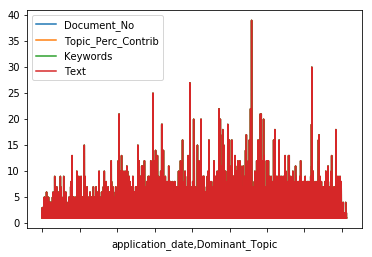

In [18]:
data.groupby(["application_date","Dominant_Topic"]).count().plot()

**The problem is occuring as it is taking mponths and days in application date as well. We need to use dt.year to focus only on year**

In [19]:
data.dtypes

Document_No                    int64
Dominant_Topic               float64
Topic_Perc_Contrib           float64
Keywords                      object
Text                          object
application_date      datetime64[ns]
dtype: object

In [20]:
data['application_date'].dt.year

0        1990.0
1        1990.0
2        1994.0
3        1993.0
4        1993.0
5        1991.0
6        1995.0
7        1992.0
8        2002.0
9        2002.0
10       2002.0
11       1999.0
12       1999.0
13       1999.0
14       1999.0
15       1999.0
16       1999.0
17       1999.0
18       1999.0
19       1999.0
20       1999.0
21       1999.0
22       1999.0
23       1999.0
24       1999.0
25       1999.0
26       1999.0
27       1999.0
28       1996.0
29       1999.0
          ...  
68734       NaN
68735       NaN
68736       NaN
68737       NaN
68738       NaN
68739       NaN
68740       NaN
68741       NaN
68742       NaN
68743       NaN
68744       NaN
68745       NaN
68746       NaN
68747       NaN
68748       NaN
68749       NaN
68750       NaN
68751       NaN
68752       NaN
68753       NaN
68754       NaN
68755       NaN
68756       NaN
68757       NaN
68758       NaN
68759       NaN
68760       NaN
68761       NaN
68762       NaN
68763       NaN
Name: application_date, 

In [21]:
data.groupby(data.application_date.dt.year).Dominant_Topic.value_counts()

application_date  Dominant_Topic
1990.0            13.0               29
                  11.0               19
                  7.0                11
                  9.0                 8
                  5.0                 7
                  10.0                5
                  4.0                 3
                  8.0                 2
                  1.0                 1
                  3.0                 1
1991.0            13.0               45
                  11.0               30
                  10.0               25
                  7.0                21
                  4.0                13
                  9.0                12
                  8.0                 7
                  5.0                 6
                  1.0                 3
                  12.0                1
1992.0            10.0               62
                  13.0               60
                  11.0               45
                  7.0                35
       

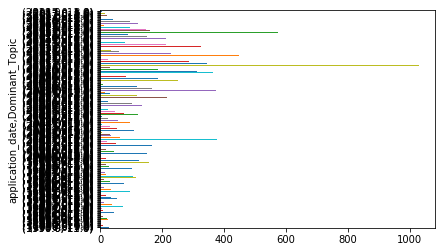

In [22]:
data.groupby(data.application_date.dt.year).Dominant_Topic.value_counts().plot(kind='barh')

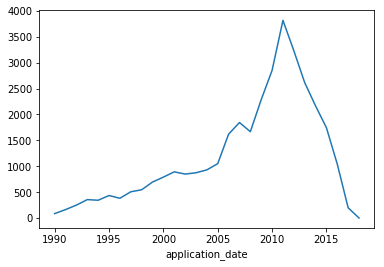

In [23]:
data.groupby(data.application_date.dt.year).Dominant_Topic.count().plot()

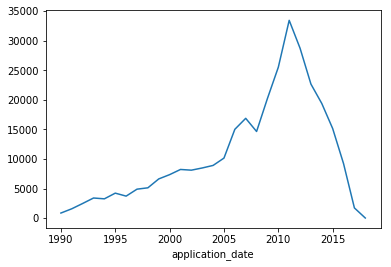

In [24]:
data.groupby(data.application_date.dt.year).Dominant_Topic.sum().plot()

# For rough work

In [25]:
topic=data['Dominant_Topic']
topic.head()

0    1.0
1    5.0
2    9.0
3    7.0
4    9.0
Name: Dominant_Topic, dtype: float64

In [26]:
data.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,application_date
0,0,1.0,0.4353,"hydrogen, fuel, water, tank, cell, diesel, oil...","[electrical, energy, system, include, electric...",1990-07-19
1,1,5.0,0.6834,"battery, power, voltage, electric, charge, ene...","[electrical, energy, system, include, electric...",1990-07-19
2,2,9.0,0.6159,"catalyst, exhaust, gas, powertrain, fuel, cell...","[object, provide, particulate, trap, diesel, e...",1994-05-20
3,3,7.0,0.3142,"body, plate, support, fix, part, lock, member,...","[purpose, obtain, trap, leakage, exhaust, gas,...",1993-05-28
4,4,9.0,0.4365,"catalyst, exhaust, gas, powertrain, fuel, cell...","[particulate, trap, diesel, engine, design, ef...",1993-05-28


In [27]:
filling_date=data['application_date']
filling_date.head()

0   1990-07-19
1   1990-07-19
2   1994-05-20
3   1993-05-28
4   1993-05-28
Name: application_date, dtype: datetime64[ns]

In [28]:
filling_date.shape

(68764,)

In [29]:
df = pd.DataFrame({'TOPIC':topic,
                   'Filling_Date':filling_date})

In [30]:
df.head()

,TOPIC,Filling_Date
0,1.0,1990-07-19
1,5.0,1990-07-19
2,9.0,1994-05-20
3,7.0,1993-05-28
4,9.0,1993-05-28


Now get counts per category, per year:

In [31]:
ctdf = (df.reset_index()
          .groupby((df.Filling_Date.dt.year).TOPIC, as_index=False)
          .value_counts()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

AttributeError: 'Series' object has no attribute 'TOPIC'

In [32]:
ctdf=df.groupby(df.Filling_Date.dt.year).TOPIC.value_counts()

In [33]:
ctdf.head()

Filling_Date  TOPIC
1990.0        13.0     29
              11.0     19
              7.0      11
              9.0       8
              5.0       7
Name: TOPIC, dtype: int64

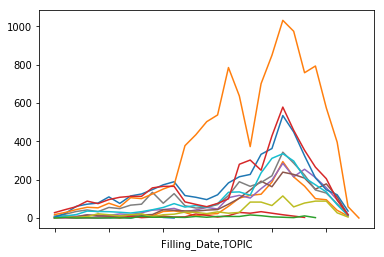

In [34]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('TOPIC'):
    data.plot(x='Filling_Date', y='ct', ax=ax, label=key)

In [35]:
data.groupby(data.application_date.dt.year).Dominant_Topic.value_counts()

AttributeError: 'Series' object has no attribute 'application_date'

In [36]:
df.groupby(df.Filling_Date.dt.year).TOPIC.value_counts()

Filling_Date  TOPIC
1990.0        13.0      29
              11.0      19
              7.0       11
              9.0        8
              5.0        7
              10.0       5
              4.0        3
              8.0        2
              1.0        1
              3.0        1
1991.0        13.0      45
              11.0      30
              10.0      25
              7.0       21
              4.0       13
              9.0       12
              8.0        7
              5.0        6
              1.0        3
              12.0       1
1992.0        10.0      62
              13.0      60
              11.0      45
              7.0       35
              9.0       19
              4.0       10
              5.0        7
              1.0        4
              8.0        4
              12.0       4
                      ... 
2015.0        4.0      159
              10.0     148
              9.0      137
              7.0      131
              1.0       96
        

In [37]:
# For year 2014 only, number of patent applications per topic
df.groupby(df.Filling_Date.dt.year==2014).TOPIC.value_counts()

Filling_Date  TOPIC
False         11.0     21547
              13.0      7378
              5.0       6998
              10.0      6995
              7.0       5854
              4.0       5807
              8.0       4598
              9.0       3908
              1.0       2771
              3.0        406
              12.0       226
              0.0         88
              6.0         19
              2.0          4
True          11.0       793
              13.0       266
              4.0        212
              10.0       210
              9.0        174
              5.0        151
              7.0        147
              1.0        102
              8.0         89
              3.0         18
              12.0         3
Name: TOPIC, dtype: int64

### (b) Change in the share of patents over filing year

In [42]:
df.groupby(df.Filling_Date.dt.year).TOPIC.value_counts(normalize=True)

Filling_Date  TOPIC
1990          2.0      0.337209
              6.0      0.267442
              5.0      0.244186
              8.0      0.081395
              3.0      0.034884
              1.0      0.011628
              4.0      0.011628
              7.0      0.011628
1991          2.0      0.245399
              6.0      0.226994
              5.0      0.202454
              8.0      0.128834
              1.0      0.085890
              9.0      0.049080
              4.0      0.030675
              7.0      0.030675
1992          6.0      0.300000
              2.0      0.292000
              5.0      0.144000
              8.0      0.120000
              1.0      0.076000
              4.0      0.024000
              7.0      0.016000
              9.0      0.016000
              3.0      0.012000
1993          2.0      0.314607
              8.0      0.252809
              6.0      0.132022
              1.0      0.089888
              5.0      0.087079
                    

In [38]:
ctdf2=df.groupby(df.Filling_Date.dt.year).TOPIC.value_counts(normalize=True)

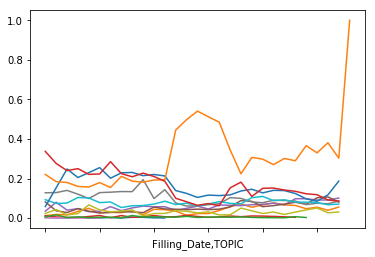

In [39]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf2.groupby('TOPIC'):
    data.plot(x='Filling_Date', y='ct', ax=ax, label=key)

# 4)- Share of patents by  technological topics

table 3 in paper

In [40]:
# start with 2010
df.groupby(df.Filling_Date.dt.year==2010).TOPIC.value_counts()

Filling_Date  TOPIC
False         11.0     21491
              13.0      7215
              5.0       6985
              10.0      6842
              4.0       5821
              7.0       5780
              8.0       4621
              9.0       3770
              1.0       2685
              3.0        394
              12.0       212
              0.0         76
              6.0         19
              2.0          4
True          11.0       849
              13.0       429
              10.0       363
              9.0        312
              7.0        221
              4.0        198
              1.0        188
              5.0        164
              8.0         66
              3.0         30
              12.0        17
              0.0         12
Name: TOPIC, dtype: int64

2849 for 2010<br>
2849/34223=8.32 %

In [41]:
# For 2011
df.groupby(df.Filling_Date.dt.year==2011).TOPIC.value_counts()

Filling_Date  TOPIC
False         11.0     21309
              13.0      7065
              5.0       6909
              10.0      6670
              4.0       5733
              7.0       5657
              8.0       4571
              9.0       3746
              1.0       2578
              3.0        398
              12.0       216
              0.0         74
              6.0         18
              2.0          4
True          11.0      1031
              13.0       579
              10.0       535
              7.0        344
              9.0        336
              1.0        295
              4.0        286
              5.0        240
              8.0        116
              3.0         26
              0.0         14
              12.0        13
              6.0          1
Name: TOPIC, dtype: int64

for year 2010, we have told of 3816 which has patent share of <br>

3816/34223=11.15%

In [42]:
# for 2012
df.groupby(df.Filling_Date.dt.year==2012).TOPIC.value_counts()

Filling_Date  TOPIC
False         11.0     21366
              13.0      7186
              5.0       6921
              10.0      6756
              4.0       5803
              7.0       5714
              8.0       4628
              9.0       3784
              1.0       2658
              3.0        390
              12.0       222
              0.0         84
              6.0         17
              2.0          4
True          11.0       974
              13.0       458
              10.0       449
              9.0        298
              7.0        287
              5.0        228
              4.0        216
              1.0        215
              8.0         59
              3.0         34
              12.0         7
              0.0          4
              6.0          2
Name: TOPIC, dtype: int64

For 2012, 3231 <br>
9.44%

In [43]:
# for 2013
df.groupby(df.Filling_Date.dt.year==2013).TOPIC.value_counts()

Filling_Date  TOPIC
False         11.0     21582
              13.0      7290
              5.0       6940
              10.0      6880
              7.0       5776
              4.0       5764
              8.0       4608
              9.0       3871
              1.0       2706
              3.0        398
              12.0       224
              0.0         88
              6.0         18
              2.0          4
True          11.0       758
              13.0       354
              10.0       325
              4.0        255
              7.0        225
              9.0        211
              5.0        209
              1.0        167
              8.0         79
              3.0         26
              12.0         5
              6.0          1
Name: TOPIC, dtype: int64

In [44]:
# for 2013, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2013).TOPIC.count()

Filling_Date
False    66149
True      2615
Name: TOPIC, dtype: int64

In [45]:
2615/34223

0.07641060105776817

In [46]:
# for 2014, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2014).TOPIC.count()

Filling_Date
False    66599
True      2165
Name: TOPIC, dtype: int64

In [47]:
2165/34223

0.06326154925050405

In [48]:
# for 2015, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2015).TOPIC.count()

Filling_Date
False    67020
True      1744
Name: TOPIC, dtype: int64

In [49]:
1744/34223

0.050959880781930283

In [50]:
# for 2016, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2016).TOPIC.count()

Filling_Date
False    67724
True      1040
Name: TOPIC, dtype: int64

In [51]:
1040/34223

0.030388919732343745

In [52]:
# for 2017, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2017).TOPIC.count()

Filling_Date
False    68566
True       198
Name: TOPIC, dtype: int64

In [53]:
198/34223

0.005785582795196213

In [54]:
# for 2018, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2018).TOPIC.count()

Filling_Date
False    68763
True         1
Name: TOPIC, dtype: int64

In [55]:
1/34223

2.92201151272536e-05

**The average patent share in 2012 by topic was 9.44%. So, we will take it as reference value to determine whether given patent is samll or large**

In [56]:
## for 2012
df.groupby(df.Filling_Date.dt.year==2012).TOPIC.value_counts()

Filling_Date  TOPIC
False         11.0     21366
              13.0      7186
              5.0       6921
              10.0      6756
              4.0       5803
              7.0       5714
              8.0       4628
              9.0       3784
              1.0       2658
              3.0        390
              12.0       222
              0.0         84
              6.0         17
              2.0          4
True          11.0       974
              13.0       458
              10.0       449
              9.0        298
              7.0        287
              5.0        228
              4.0        216
              1.0        215
              8.0         59
              3.0         34
              12.0         7
              0.0          4
              6.0          2
Name: TOPIC, dtype: int64

In [57]:
df.groupby(df.Filling_Date.dt.year==2012).TOPIC.count()

Filling_Date
False    65533
True      3231
Name: TOPIC, dtype: int64

In [58]:
# For 2012,current patent share
df.groupby(df.Filling_Date.dt.year==2012).TOPIC.value_counts(normalize=True)

Filling_Date  TOPIC
False         11.0     0.326034
              13.0     0.109655
              5.0      0.105611
              10.0     0.103093
              4.0      0.088551
              7.0      0.087193
              8.0      0.070621
              9.0      0.057742
              1.0      0.040560
              3.0      0.005951
              12.0     0.003388
              0.0      0.001282
              6.0      0.000259
              2.0      0.000061
True          11.0     0.301455
              13.0     0.141752
              10.0     0.138966
              9.0      0.092232
              7.0      0.088827
              5.0      0.070566
              4.0      0.066852
              1.0      0.066543
              8.0      0.018261
              3.0      0.010523
              12.0     0.002167
              0.0      0.001238
              6.0      0.000619
Name: TOPIC, dtype: float64

### Calculate CAGR
https://www.investopedia.com/terms/c/cagr.asp

We will consider years from 2010-2014

In [59]:
df.groupby(df.Filling_Date.dt.year==2010).TOPIC.value_counts()

Filling_Date  TOPIC
False         11.0     21491
              13.0      7215
              5.0       6985
              10.0      6842
              4.0       5821
              7.0       5780
              8.0       4621
              9.0       3770
              1.0       2685
              3.0        394
              12.0       212
              0.0         76
              6.0         19
              2.0          4
True          11.0       849
              13.0       429
              10.0       363
              9.0        312
              7.0        221
              4.0        198
              1.0        188
              5.0        164
              8.0         66
              3.0         30
              12.0        17
              0.0         12
Name: TOPIC, dtype: int64

Initial values for patent share are given 

In [60]:
df.groupby(df.Filling_Date.dt.year==2015).TOPIC.value_counts()

Filling_Date  TOPIC
False         11.0     21765
              13.0      7438
              10.0      7057
              5.0       6970
              7.0       5870
              4.0       5860
              8.0       4598
              9.0       3945
              1.0       2777
              3.0        413
              12.0       217
              0.0         87
              6.0         19
              2.0          4
True          11.0       575
              13.0       206
              5.0        179
              4.0        159
              10.0       148
              9.0        137
              7.0        131
              1.0         96
              8.0         89
              12.0        12
              3.0         11
              0.0          1
Name: TOPIC, dtype: int64